# Importing The libraries

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pt


In [55]:
# Importing the dataset
dataset=pd.read_csv('Restaurant_Reviews.tsv' , delimiter='\t' , quoting =3) #for ignoring double "
# Analyzing the dataset
print(dataset.values[0][0])
print(dataset['Review'][0])


Wow... Loved this place.
Wow... Loved this place.


 # Cleaning the Text


In [56]:
# re library is used for better searching ,
# among its other application one that we use here is split
import re
# NLTK (Natural Language Toolkit)
import nltk
# stopwords will remove the Unwanted words like the,they etc 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Stemming is a technique where a set of words in a sentence
# are converted into a sequence to shorten its lookup

# corpus will be our final requirement for bag of words
corpus = []    

# Iterating For every sample data 
for i in range (0,1000):
    # replaces the substring not haveing characters (a-z or A-Z) with ' '
    review = re.sub('[^a-zA-Z]' ,' ', dataset['Review'][i])
    # Makes the substrings into lower cases
    review = review.lower()
    # Makes each remaining sentence into list(object) of words(string) 
    review = review.split()                                 
    # For each word not present in stopwords it stem the word
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # Joining the list element back into string
    review = ' '.join(review)
    # Appending it to our corpus
    corpus.append(review)    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HimachalGupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating the bag of words model 


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
# Bag of Words Model is a sparse matrix where each row is the review and each column is a unique 
# word from the reviews.
# Tokenization is the process of taking all unique words of reviews and creating columns for each word.
# Since this a problem of classification we have dependent and independent variables and each 
# unique word/column is like an independent variable and the review(good/bad) depends on these words
# Making the Bag of words with 1500 Most frequent words as features 
# and each data-set will be defined by token if a word in it matches these 
# 1500 words
cv = CountVectorizer(max_features = 1500) 
X = cv.fit_transform(corpus).toarray()
# making matrix of dependent variable (Positive or negative values)
Y = dataset.iloc[:,1].values

# Plotting the top 20 Words as Histogram

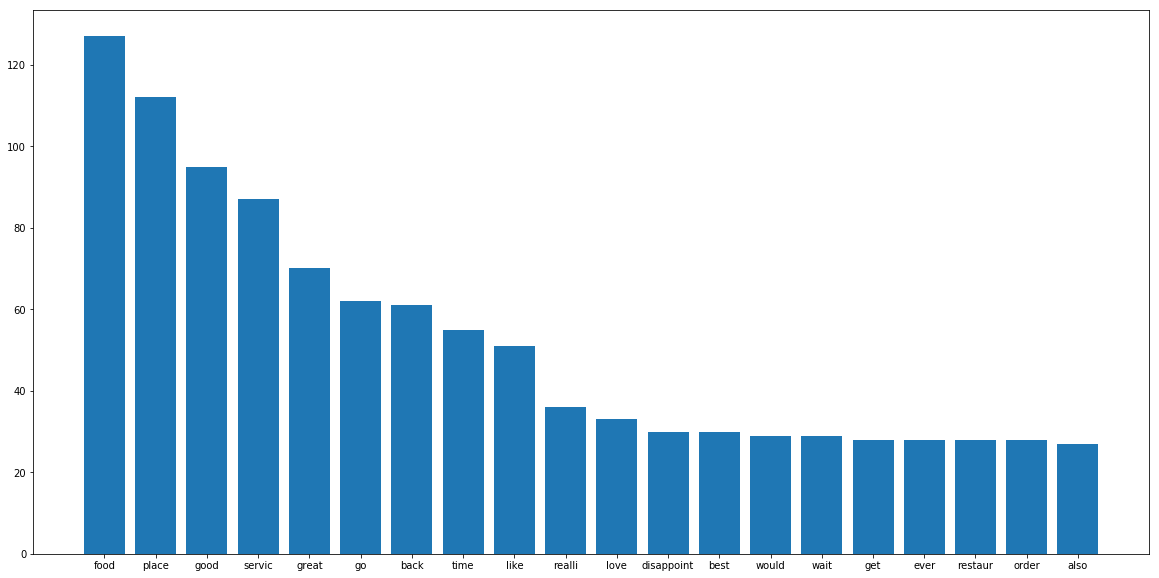

In [63]:
vec = CountVectorizer(max_features = 1500).fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
indexes=[word[1] for word in words_freq]
values =[word[0] for word in words_freq]
indexes = indexes[:20]
values  = values [:20]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(values, indexes)
plt.show()


# Splitting into training-set and test-set and applying various ML Classification Models 

In [65]:
# Splitting the data set into test set and training set
from sklearn.cross_validation import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.20 , random_state=0)
cm_list=[]


In [66]:
# Applying Logistic Regression
def model(X_train , X_test , Y_train , Y_test):
    # Fitting Logistic Regression to training set
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression ( random_state=0 )
    classifier.fit(X_train,Y_train)
    
    # PRedicting the cm_list
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm     
cm_list.append(model(X_train , X_test , Y_train , Y_test))

# Applying KNN
def model(X_train , X_test , Y_train , Y_test):
    # Fitting KNN to training set
    from sklearn.neighbors import KNeighborsClassifier
    classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    classifier.fit(X_train,Y_train)
    
    # Predicting the result
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm     
cm_list.append(model(X_train , X_test , Y_train , Y_test))

# Applying SVM Linear
def model(X_train , X_test , Y_train , Y_test):
    # Fitting SVM Linear to training set
    from sklearn.svm import SVC
    classifier=SVC(kernel='linear',random_state=0) 
    classifier.fit(X_train,Y_train)

    # Predicting the result
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm  
cm_list.append(model(X_train , X_test , Y_train , Y_test))

# Applying SVM Gaussian Kernel
def model(X_train , X_test , Y_train , Y_test):
    # Fitting SVM to training set
    from sklearn.svm import SVC
    classifier=SVC(kernel='rbf',random_state=0) 
    classifier.fit(X_train,Y_train)

    # Predicting the result
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm  
cm_list.append(model(X_train , X_test , Y_train , Y_test))

# Applying SVM Polynomial Kernel
def model(X_train , X_test , Y_train , Y_test):
    # Fitting SVM to training set
    from sklearn.svm import SVC
    classifier=SVC(kernel='poly',random_state=0) 
    classifier.fit(X_train,Y_train)

    # Predicting the result
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm  
cm_list.append(model(X_train , X_test , Y_train , Y_test))

# Applying SVM Sigmoid Kernel
def model(X_train , X_test , Y_train , Y_test):
    # Fitting SVM to training set
    from sklearn.svm import SVC
    classifier=SVC(kernel='sigmoid',random_state=0) 
    classifier.fit(X_train,Y_train)

    # Predicting the result
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm  
cm_list.append(model(X_train , X_test , Y_train , Y_test))

# Applying Naive bayes
def model(X_train , X_test , Y_train , Y_test):
    # Fitting Naive Bayes to training set
    from sklearn.naive_bayes import GaussianNB
    classifier=GaussianNB() 
    classifier.fit(X_train,Y_train)
    
    # PRedicting the result
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm     
cm_list.append(model(X_train , X_test , Y_train , Y_test))
        
# Applying Decision Tree
def model(X_train , X_test , Y_train , Y_test):
    # Fitting Decision Tree to training set
    from sklearn.tree import DecisionTreeClassifier
    classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier.fit(X_train,Y_train)

    # Predicting the result
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm  
cm_list.append(model(X_train , X_test , Y_train , Y_test))

# Applying Random Forest Tree
def model(X_train , X_test , Y_train , Y_test):
    # Fitting Decision Tree to training set
    from sklearn.ensemble import RandomForestClassifier
    classifier=RandomForestClassifier(n_estimators=10 , criterion='entropy' , random_state=0)
    classifier.fit(X_train,Y_train)

    # Predicting the result
    Y_pred=classifier.predict(X_test)
      
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)
    return cm  
cm_list.append(model(X_train , X_test , Y_train , Y_test))


# Analyzing the results

In [68]:
result=[[]]
for i in range (0,9):
    tmp=[]
    for j in range (0,2):
        for k in range (0,2):
            tmp.append(cm_list[i][j][k])        
    tmp.append(   (tmp[0]+tmp[3])/(tmp[0]+tmp[1]+tmp[2]+tmp[3])    )  # Accuracy
    tmp.append(   tmp[3]/(tmp[3]+tmp[1])   )                          # Precision
    tmp.append(   tmp[3]/(tmp[3]+tmp[2])   )                          # Recall
    tmp.append(   (2*tmp[5]*tmp[6])/(tmp[5]+tmp[6])  )                # F1 Score
    result.append(tmp)
result.remove([])        

result = pd.DataFrame(result , columns=['TN','FP','FN','TP','Accuracy','Precision','Recall','F1 Score'])

df = pd.DataFrame(columns=['Model Name'])
value=["Logistic Regression",'KNN','SVM-Linear','SVM-Gaussian',
                                  'SVM-Poly','SVM-Sigmoid','Naive Bayes','Decision Tree',
                                  'Random Forest']
for i in range (0,9):
    df = df.append({'Model Name' : value[i]}, ignore_index=True)        

result=pd.concat([df,result],axis=1)
result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  


,Model Name,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,76,21,37,66,0.710,0.758621,0.640777,0.694737
1,KNN,74,23,55,48,0.610,0.676056,0.466019,0.551724
2,SVM-Linear,74,23,33,70,0.720,0.752688,0.679612,0.714286
3,SVM-Gaussian,97,0,103,0,0.485,NaN,0.000000,NaN
4,SVM-Poly,97,0,103,0,0.485,NaN,0.000000,NaN
5,SVM-Sigmoid,97,0,103,0,0.485,NaN,0.000000,NaN
6,Naive Bayes,55,42,12,91,0.730,0.684211,0.883495,0.771186
7,Decision Tree,74,23,35,68,0.710,0.747253,0.660194,0.701031
8,Random Forest,87,10,46,57,0.720,0.850746,0.553398,0.670588
